In [1]:
import keras
from keras import backend as K
from keras import layers, regularizers, callbacks

import tensorflow as tf
import random

import numpy as np
import pandas as pd
from sklearn.metrics import multilabel_confusion_matrix, f1_score, recall_score, precision_score, accuracy_score, hamming_loss


import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [2]:
version = 'v0'

# label load

In [3]:
train_X = pd.read_excel('./data/paper_train.xlsx')
train_X = train_X.drop(['Unnamed: 0', 'abstract'], axis=1)
train_X

,3D프린팅,4차산업,4차산업혁명,STEAM교육,가상현실,감성,감성분석,감정,강한인공지능,강화학습,...,핀테크,학습,학습동기,학습성과,학업성취도,합성곱신경망,핵심역량,헬스케어,혁신,협업
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2801,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2802,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
val_X = pd.read_excel('./data/paper_val.xlsx')
val_X = val_X.drop(['Unnamed: 0', 'abstract'], axis=1)
val_X

,3D프린팅,4차산업,4차산업혁명,STEAM교육,가상현실,감성,감성분석,감정,강한인공지능,강화학습,...,핀테크,학습,학습동기,학습성과,학업성취도,합성곱신경망,핵심역량,헬스케어,혁신,협업
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
931,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_X = pd.read_excel('./data/paper_test.xlsx')
test_X = test_X.drop(['Unnamed: 0', 'abstract'], axis=1)
test_X

,3D프린팅,4차산업,4차산업혁명,STEAM교육,가상현실,감성,감성분석,감정,강한인공지능,강화학습,...,핀테크,학습,학습동기,학습성과,학업성취도,합성곱신경망,핵심역량,헬스케어,혁신,협업
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
931,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
one_hot_train_labels = np.array(train_X)
one_hot_train_labels
print(one_hot_train_labels.shape)

one_hot_val_labels = np.array(val_X)
one_hot_val_labels
print(one_hot_val_labels.shape)

one_hot_test_labels = np.array(test_X)
one_hot_test_labels
print(one_hot_test_labels.shape)

(2805, 262)
(935, 262)
(935, 262)


# Stacked autoencoder

In [7]:
encoding_dim = 4

input_label = keras.Input(shape=(one_hot_train_labels.shape[1],))

encoded = layers.Dense(256, activation='relu')(input_label)

latent_space = layers.Dense(encoding_dim, activation='relu')(encoded)

decoded = layers.Dense(256, activation='relu')(latent_space)
decoded = layers.Dense(one_hot_train_labels.shape[1], activation='sigmoid')(decoded)

autoencoder = keras.Model(input_label, decoded)

autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 262)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               67328     
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 1028      
_________________________________________________________________
dense_3 (Dense)              (None, 256)               1280      
_________________________________________________________________
dense_4 (Dense)              (None, 262)               67334     
Total params: 136,970
Trainable params: 136,970
Non-trainable params: 0
_________________________________________________________________


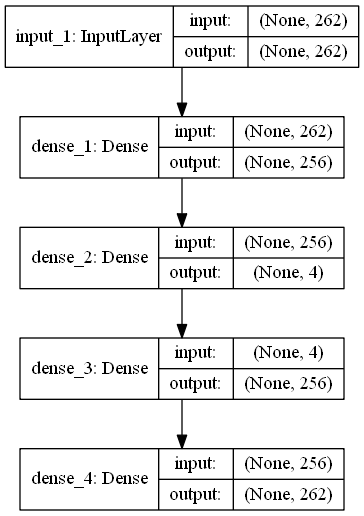

In [8]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

%matplotlib inline

SVG(model_to_dot(autoencoder, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

plot_model(autoencoder, show_shapes=True, to_file='./img/AE_{}.png'.format(version))

In [9]:
encoder = keras.Model(input_label, latent_space)

encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 262)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               67328     
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 1028      
Total params: 68,356
Trainable params: 68,356
Non-trainable params: 0
_________________________________________________________________


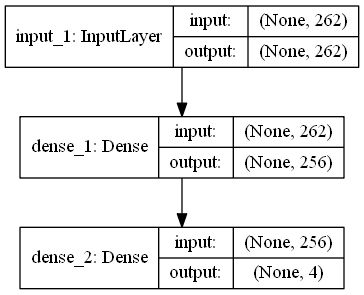

In [10]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

%matplotlib inline

SVG(model_to_dot(encoder, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

plot_model(encoder, show_shapes=True, to_file='./img/Encoder_{}.png'.format(version))

In [11]:
encoded_input = keras.Input(shape=(encoding_dim,))

decoder_layer1 = autoencoder.layers[-2](encoded_input)
decoder_layer2 = autoencoder.layers[-1](decoder_layer1)

decoder = keras.Model(encoded_input, decoder_layer2)

decoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               1280      
_________________________________________________________________
dense_4 (Dense)              (None, 262)               67334     
Total params: 68,614
Trainable params: 68,614
Non-trainable params: 0
_________________________________________________________________


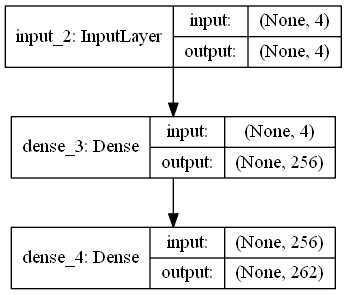

In [12]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

%matplotlib inline

SVG(model_to_dot(decoder, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

plot_model(decoder, show_shapes=True, to_file='./img/Decoder_{}.png'.format(version))

In [13]:
optimizer = keras.optimizers.Adam(lr=0.001)

autoencoder.compile(loss=['binary_crossentropy'], optimizer=optimizer)
encoder.compile(loss=['binary_crossentropy'], optimizer=optimizer)
decoder.compile(loss=['binary_crossentropy'], optimizer=optimizer)

In [14]:
es = callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='auto')

filename = './trained_model/AE_{}'.format(version) + '_{epoch:02d}_{val_loss:.5f}.h5'
mc = callbacks.ModelCheckpoint(filename, monitor='val_loss', verbose=1, mode='auto')

In [15]:
history = autoencoder.fit(one_hot_train_labels,
                          one_hot_train_labels,
                          epochs=300,
                          batch_size=64,
                          validation_data=(one_hot_val_labels, one_hot_val_labels),
                          callbacks=[es, mc])

Train on 2805 samples, validate on 935 samples
Epoch 1/300
2805/2805 [==============================] - 1s 432us/step - loss: 0.5136 - val_loss: 0.1210

Epoch 00001: saving model to ./trained_model/AE_v0_01_0.12098.h5
Epoch 2/300
2805/2805 [==============================] - 0s 56us/step - loss: 0.0496 - val_loss: 0.0395

Epoch 00002: saving model to ./trained_model/AE_v0_02_0.03951.h5
Epoch 3/300
2805/2805 [==============================] - 0s 54us/step - loss: 0.0381 - val_loss: 0.0380

Epoch 00003: saving model to ./trained_model/AE_v0_03_0.03803.h5
Epoch 4/300
2805/2805 [==============================] - 0s 55us/step - loss: 0.0368 - val_loss: 0.0372

Epoch 00004: saving model to ./trained_model/AE_v0_04_0.03724.h5
Epoch 5/300
2805/2805 [==============================] - 0s 57us/step - loss: 0.0360 - val_loss: 0.0366

Epoch 00005: saving model to ./trained_model/AE_v0_05_0.03659.h5
Epoch 6/300
2805/2805 [==============================] - 0s 58us/step - loss: 0.0353 - val_loss: 0.036

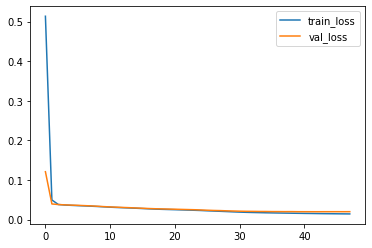

In [16]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [17]:
encoder.save('./trained_model/encoder_{}.h5'.format(version))
decoder.save('./trained_model/decoder_{}.h5'.format(version))

# inference

In [18]:
encoded_values = encoder.predict(one_hot_test_labels)
encoded_values

array([[3.4617965, 3.1200945, 4.54203  , 7.8799214],
       [2.0071568, 7.447059 , 1.9631428, 2.0019271],
       [2.2238388, 2.6495938, 1.9036897, 1.8410758],
       ...,
       [7.687333 , 1.2665697, 8.27486  , 1.2908635],
       [4.4274707, 1.5143734, 4.110149 , 2.332038 ],
       [2.6943228, 2.2703094, 1.878617 , 3.4836137]], dtype=float32)

In [19]:
b = pd.DataFrame(encoded_values)
b.describe()

,0,1,2,3
count,935.000000,935.000000,935.000000,935.000000
mean,3.161995,3.085262,2.792562,3.019955
std,2.092383,2.038221,2.135037,1.928004
min,0.000000,0.000000,0.000000,0.000000
25%,1.596310,1.737576,1.237203,1.589134
50%,2.610045,2.649594,2.515152,2.715564
75%,4.485199,4.240382,3.926381,4.092186
max,12.571715,14.135756,11.928130,11.322440


In [20]:
#b.to_excel('./Stacked_AE_v6.xlsx')

In [21]:
encoded_values[:, :]

array([[3.4617965, 3.1200945, 4.54203  , 7.8799214],
       [2.0071568, 7.447059 , 1.9631428, 2.0019271],
       [2.2238388, 2.6495938, 1.9036897, 1.8410758],
       ...,
       [7.687333 , 1.2665697, 8.27486  , 1.2908635],
       [4.4274707, 1.5143734, 4.110149 , 2.332038 ],
       [2.6943228, 2.2703094, 1.878617 , 3.4836137]], dtype=float32)

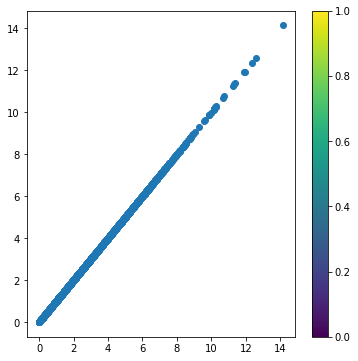

In [22]:
plt.figure(figsize=(6, 6))
plt.scatter(encoded_values[:, :], encoded_values[:, :])
plt.colorbar()
plt.show()

In [23]:
decoded_label = decoder.predict(encoded_values)
decoded_label

array([[1.38919624e-02, 1.70603255e-03, 5.66185236e-01, ...,
        2.09634076e-03, 2.39879606e-04, 1.54143330e-04],
       [8.63729745e-15, 3.48315936e-08, 4.80350855e-24, ...,
        2.11908377e-12, 4.40077865e-14, 1.85874370e-07],
       [2.42014474e-04, 9.72360023e-04, 1.33955400e-05, ...,
        3.34141892e-04, 6.82152691e-04, 1.67738937e-03],
       ...,
       [5.03820985e-10, 5.90923848e-13, 3.77812995e-07, ...,
        2.17308701e-17, 2.12899531e-10, 1.59681810e-03],
       [1.54232577e-04, 9.47697390e-06, 1.25652142e-02, ...,
        1.10157906e-07, 1.11294608e-03, 7.75736105e-03],
       [2.91431532e-03, 6.44229213e-03, 1.85004160e-01, ...,
        1.00460034e-02, 4.89113014e-03, 2.17604171e-03]], dtype=float32)

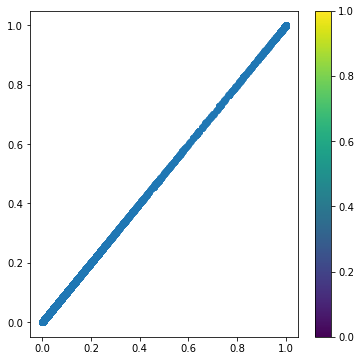

In [24]:
plt.figure(figsize=(6, 6))
plt.scatter(decoded_label[:, :], decoded_label[:, :])
plt.colorbar()
plt.show()

In [25]:
predicted_label = decoded_label.round()
predicted_label

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [26]:
one_hot_test_labels

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [27]:
c_matrix = multilabel_confusion_matrix(one_hot_test_labels, predicted_label)

In [28]:
c_matrix.shape

(262, 2, 2)

In [29]:
c_matrix

array([[[933,   0],
        [  2,   0]],

       [[928,   0],
        [  7,   0]],

       [[861,  13],
        [ 25,  36]],

       ...,

       [[932,   0],
        [  3,   0]],

       [[934,   0],
        [  1,   0]],

       [[934,   0],
        [  1,   0]]], dtype=int64)

In [30]:
accuracy_score(one_hot_test_labels, predicted_label)

0.25775401069518716

In [31]:
precision_score(one_hot_test_labels, predicted_label, average='micro')

0.8379120879120879

In [32]:
recall_score(one_hot_test_labels, predicted_label, average='micro')

0.36724864539434077

In [33]:
f1_score(one_hot_test_labels, predicted_label, average='micro')

0.5106739221431561

In [34]:
hamming_loss(one_hot_test_labels, predicted_label)

0.004772012899538719

In [35]:
"""labels = ["".join("c" + str(i)) for i in range(1, 21)]
labels"""

'labels = ["".join("c" + str(i)) for i in range(1, 21)]\nlabels'

In [36]:
"""import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=12):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    axes.set_xlabel('True label')
    axes.set_ylabel('Predicted label')
    axes.set_title("Confusion Matrix for the class - " + class_label)"""

'import pandas as pd\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\ndef print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=12):\n\n    df_cm = pd.DataFrame(\n        confusion_matrix, index=class_names, columns=class_names,\n    )\n\n    try:\n        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)\n    except ValueError:\n        raise ValueError("Confusion matrix values must be integers.")\n    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha=\'right\', fontsize=fontsize)\n    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha=\'right\', fontsize=fontsize)\n    axes.set_xlabel(\'True label\')\n    axes.set_ylabel(\'Predicted label\')\n    axes.set_title("Confusion Matrix for the class - " + class_label)'

In [37]:
"""fig, ax = plt.subplots(5, 4, figsize=(12, 12))
    
for axes, cfs_matrix, label in zip(ax.flatten(), c_matrix, labels):
    print_confusion_matrix(cfs_matrix, axes, label, ["Y", "N"])
    
fig.tight_layout()
plt.show()"""

'fig, ax = plt.subplots(5, 4, figsize=(12, 12))\n    \nfor axes, cfs_matrix, label in zip(ax.flatten(), c_matrix, labels):\n    print_confusion_matrix(cfs_matrix, axes, label, ["Y", "N"])\n    \nfig.tight_layout()\nplt.show()'